In [28]:
import nltk

from gensim.models import Word2Vec
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
%matplotlib inline
import re

In [29]:
paragraph ="Data science is an inter-disciplinary field that uses scientific methods, processes, algorithms and systems to extract knowledge and insights from many structural and unstructured data. Data science is related to data mining, machine learning and big dataData science isconcept to unify statistics, data analysis, machine learning, domain knowledge and their related methods in order to understand and analyze actual phenomena with data.[3] It uses techniques and theories drawn from many fields within the context of mathematics, statistics, computer science, domain knowledge and information science. Turing award winner Jim Gray imagined data science as a fourth paradigm of science (empirical, theoretical, computational and now data-driven) and asserted that everything about science is changing because of the impact of information technology and the data deluge Data science is an interdisciplinary field focused on extracting knowledge from data sets, which are typically large (see big data). The field encompasses analysis, preparing data for analysis, and presenting findings to inform high-level decisions in an organization. As such, it incorporates skills from computer science, mathematics, statistics, information visualization, graphic design, complex systems, communication, buzzword bingo and business.[7][8] Statistician Nathan Yau, drawing on Ben Fry, also links data science to human-computer interaction: users should be able to intuitively control and explore data.[9][10] In 2015, the American Statistical Association identified database management, statistics and machine learning, and distributed and parallel systems as the three emerging foundational professional . Many statisticians, including Nate Silver, have argued that data science is not a new field, but rather another name for statistics.[12] Others argue that data science is distinct from statistics because it focuses on problems and techniques unique to digital data.[13] Vasant Dhar writes that statistics emphasizes quantitative data and description. In contrast, data science deals with quantitative and qualitative data (e.g. images) and emphasizes prediction and action.[14] Andrew Gelman of Columbia University and data scientist Vincent Granville have described statistics as a nonessential part of data science.[15][16] Stanford professor David Donoho writes that data science is not distinguished from statistics by the size of datasets or use of computing, and that many graduate programs misleadingly advertise their analytics and statistics training as the essence of a data science program. He describes data science as an applied field growing out of traditional statistics. In summary, data science can be therefore described as an applied branch of statistics."
            

In [30]:
text = re.sub(r'\[[0-9]*\]',' ',paragraph)
text = re.sub(r'\s+',' ',text)

text = text.lower()

text = re.sub(r'\d',' ',text)
text = re.sub(r'\s+',' ',text)

In [34]:
sentences = nltk.sent_tokenize(text)
sentences

['data science is an inter-disciplinary field that uses scientific methods, processes, algorithms and systems to extract knowledge and insights from many structural and unstructured data.',
 'data science is related to data mining, machine learning and big datadata science isconcept to unify statistics, data analysis, machine learning, domain knowledge and their related methods in order to understand and analyze actual phenomena with data.',
 'it uses techniques and theories drawn from many fields within the context of mathematics, statistics, computer science, domain knowledge and information science.',
 'turing award winner jim gray imagined data science as a fourth paradigm of science (empirical, theoretical, computational and now data-driven) and asserted that everything about science is changing because of the impact of information technology and the data deluge data science is an interdisciplinary field focused on extracting knowledge from data sets, which are typically large (se

In [35]:
sent_word = [nltk.word_tokenize(sentence) for sentence in sentences]

In [36]:
sent_word

[['data',
  'science',
  'is',
  'an',
  'inter-disciplinary',
  'field',
  'that',
  'uses',
  'scientific',
  'methods',
  ',',
  'processes',
  ',',
  'algorithms',
  'and',
  'systems',
  'to',
  'extract',
  'knowledge',
  'and',
  'insights',
  'from',
  'many',
  'structural',
  'and',
  'unstructured',
  'data',
  '.'],
 ['data',
  'science',
  'is',
  'related',
  'to',
  'data',
  'mining',
  ',',
  'machine',
  'learning',
  'and',
  'big',
  'datadata',
  'science',
  'isconcept',
  'to',
  'unify',
  'statistics',
  ',',
  'data',
  'analysis',
  ',',
  'machine',
  'learning',
  ',',
  'domain',
  'knowledge',
  'and',
  'their',
  'related',
  'methods',
  'in',
  'order',
  'to',
  'understand',
  'and',
  'analyze',
  'actual',
  'phenomena',
  'with',
  'data',
  '.'],
 ['it',
  'uses',
  'techniques',
  'and',
  'theories',
  'drawn',
  'from',
  'many',
  'fields',
  'within',
  'the',
  'context',
  'of',
  'mathematics',
  ',',
  'statistics',
  ',',
  'computer',

In [39]:
for i in range(len(sent_word)):
    sent_word[i] = [word for word in sent_word[i]
                    if word not in stopwords.words('english')]

In [40]:
sent_word

[['data',
  'science',
  'inter-disciplinary',
  'field',
  'uses',
  'scientific',
  'methods',
  ',',
  'processes',
  ',',
  'algorithms',
  'systems',
  'extract',
  'knowledge',
  'insights',
  'many',
  'structural',
  'unstructured',
  'data',
  '.'],
 ['data',
  'science',
  'related',
  'data',
  'mining',
  ',',
  'machine',
  'learning',
  'big',
  'datadata',
  'science',
  'isconcept',
  'unify',
  'statistics',
  ',',
  'data',
  'analysis',
  ',',
  'machine',
  'learning',
  ',',
  'domain',
  'knowledge',
  'related',
  'methods',
  'order',
  'understand',
  'analyze',
  'actual',
  'phenomena',
  'data',
  '.'],
 ['uses',
  'techniques',
  'theories',
  'drawn',
  'many',
  'fields',
  'within',
  'context',
  'mathematics',
  ',',
  'statistics',
  ',',
  'computer',
  'science',
  ',',
  'domain',
  'knowledge',
  'information',
  'science',
  '.'],
 ['turing',
  'award',
  'winner',
  'jim',
  'gray',
  'imagined',
  'data',
  'science',
  'fourth',
  'paradigm',


In [41]:
model = Word2Vec(sent_word, min_count=1)


words = model.wv.vocab

In [42]:
vector = model.wv['data']

print(vector)

[-5.97892853e-04  1.13864406e-03 -1.03717751e-03 -4.25275601e-03
  1.58539173e-04  4.16685827e-03  4.37568827e-03  4.72262315e-03
 -3.53863765e-03  2.37075775e-03  4.12500201e-04 -4.20215633e-03
 -1.61911407e-03 -2.84978282e-03 -2.49398011e-03  1.48939516e-03
 -2.64394539e-03  1.07479771e-03  3.40978918e-03 -3.08991945e-03
  2.22114241e-03 -3.78344697e-03 -1.65734452e-03 -4.41197352e-03
 -4.50508809e-03 -4.65539051e-03  3.50954873e-03 -1.64518948e-03
 -1.51467393e-03 -4.59761266e-03  3.55927413e-03  1.31669932e-03
 -2.35141977e-03  1.79005042e-03  3.75564647e-04 -1.61153753e-03
 -1.87963399e-03  5.44195136e-05 -4.28393064e-03  6.37998048e-04
  1.12522976e-03 -2.09097448e-03  6.81609905e-04  1.15700997e-03
  9.48871020e-05 -8.74437159e-04  2.17950111e-03 -4.90677962e-03
  3.80759686e-03 -1.28603016e-03 -3.02094407e-03 -3.89861932e-04
 -3.63268919e-04 -3.25073372e-03  2.16291915e-03 -1.38611253e-03
 -3.93492589e-03  3.74564133e-03 -4.57895314e-03 -1.07113703e-03
 -1.83154561e-03 -4.08724

In [43]:
similar = model.wv.most_similar('field',topn=5)

similar

[('datasets', 0.24749526381492615),
 ('focused', 0.24072222411632538),
 ('preparing', 0.22435005009174347),
 ('visualization', 0.18053284287452698),
 ('datadata', 0.17565155029296875)]

In [44]:
model.wv.similarity(w1='understand',w2='analyze')

0.13543744

In [45]:
model.wv.similarity(w1='data',w2='data')

1.0

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


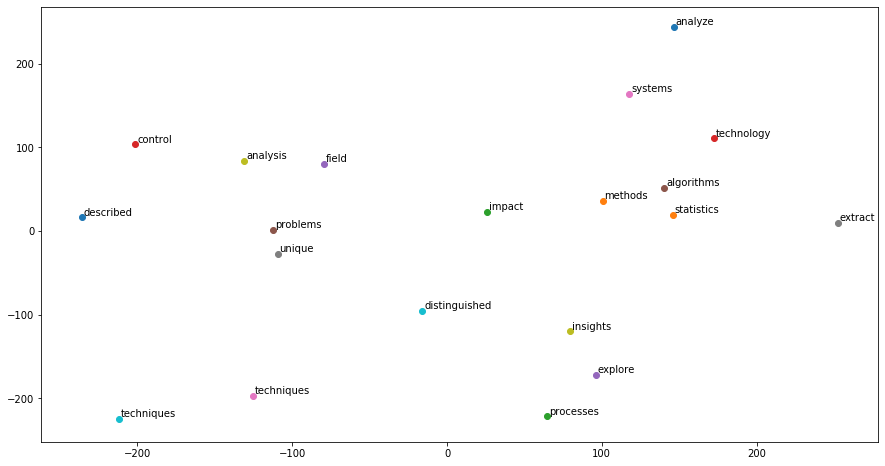

In [53]:
from sklearn.manifold import  TSNE
vocab = ['analyze','methods','processes','control','explore','problems','techniques','unique','analysis','distinguished','described','statistics','impact','technology','field','algorithms','systems','extract','insights','techniques']
def tsne_plot(model):
    labels = []
    wordvecs = []

    for word in vocab:
        wordvecs.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=3, n_components=3, init='pca', random_state=42)
    coordinates = tsne_model.fit_transform(wordvecs)

    x = []
    y = []
    for value in coordinates:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(15,8)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(2, 2),
                     textcoords='offset points', ha='left')

    plt.show()

tsne_plot(model)

In [38]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [14]:
document = "Data science is an inter-disciplinary field that uses scientific methods, processes, algorithms and systems to extract knowledge and insights from many structural and unstructured data. Data science is related to data mining, machine learning and big dataData science isconcept to unify statistics, data analysis, machine learning, domain knowledge and their related methods in order to understand and analyze actual phenomena with data.[3] It uses techniques and theories drawn from many fields within the context of mathematics, statistics, computer science, domain knowledge and information science. Turing award winner Jim Gray imagined data science as a fourth paradigm of science (empirical, theoretical, computational and now data-driven) and asserted that everything about science is changing because of the impact of information technology and the data deluge Data science is an interdisciplinary field focused on extracting knowledge from data sets, which are typically large (see big data). The field encompasses analysis, preparing data for analysis, and presenting findings to inform high-level decisions in an organization. As such, it incorporates skills from computer science, mathematics, statistics, information visualization, graphic design, complex systems, communication, buzzword bingo and business.[7][8] Statistician Nathan Yau, drawing on Ben Fry, also links data science to human-computer interaction: users should be able to intuitively control and explore data.[9][10] In 2015, the American Statistical Association identified database management, statistics and machine learning, and distributed and parallel systems as the three emerging foundational professional . Many statisticians, including Nate Silver, have argued that data science is not a new field, but rather another name for statistics.[12] Others argue that data science is distinct from statistics because it focuses on problems and techniques unique to digital data.[13] Vasant Dhar writes that statistics emphasizes quantitative data and description. In contrast, data science deals with quantitative and qualitative data (e.g. images) and emphasizes prediction and action.[14] Andrew Gelman of Columbia University and data scientist Vincent Granville have described statistics as a nonessential part of data science.[15][16] Stanford professor David Donoho writes that data science is not distinguished from statistics by the size of datasets or use of computing, and that many graduate programs misleadingly advertise their analytics and statistics training as the essence of a data science program. He describes data science as an applied field growing out of traditional statistics. In summary, data science can be therefore described as an applied branch of statistics."
            

In [15]:
text_corpus=["Machine Learning Scientist: Machine learning scientists research new methods of data analysis and create algorithms"
             "Data Engineer: Data Engineers prepare the “big data” infrastructure to be analyzed by Data Scientists. They are software engineers who design, build, integrate data from various resources, and manage big data."
             "Data Analyst: Data analysts utilize large data sets to gather information that meets their company’s needs"
             "Data Consultant: Data consultants work with businesses to determine the best usage of the information yielded from data analysis"
             "Data Architect: Data architects build data solutions that are optimized for performance and design applications"
             "•	Applications Architect: Applications architects track how applications are used throughout a business and how they interact with users and other applications"
            ]
             
    


In [16]:
import pprint

In [17]:
stoplist = set('for a of the and to in'.split(' '))


texts = [[word for word in document.lower().split() if word not in stoplist]
         for document in text_corpus]

from collections import defaultdict

frequency = defaultdict(int)

for text in texts:
    for token in text:
        frequency[token] += 1


processed_corpus = [[token for token in text if frequency[token] > 1] for text in texts]
pprint.pprint(processed_corpus)

[['machine',
  'learning',
  'machine',
  'learning',
  'data',
  'data',
  'engineers',
  'data',
  'they',
  'are',
  'engineers',
  'data',
  'from',
  'data',
  'data',
  'information',
  'that',
  'data',
  'with',
  'information',
  'from',
  'data',
  'architect:',
  'data',
  'architects',
  'data',
  'that',
  'are',
  'applications',
  'architect:',
  'applications',
  'architects',
  'how',
  'applications',
  'are',
  'how',
  'they',
  'with',
  'applications']]


In [18]:
from gensim import corpora

dictionary = corpora.Dictionary(processed_corpus)
print(dictionary)

Dictionary(14 unique tokens: ['applications', 'architect:', 'architects', 'are', 'data']...)


In [7]:
sentences = nltk.sent_tokenize(dict_STF)
sentences

NameError: name 'nltk' is not defined

In [8]:
similar = dict_STF.wv.most_similar('power',topn=5)

similar

AttributeError: 'Dictionary' object has no attribute 'wv'

In [9]:
import pprint

In [10]:
stoplist = set('for a of the and to in'.split(' '))

In [ ]:
texts = [[word for word in dict_STF.lower().split() if word not in stoplist]
         for document in text_corpus]
